#imports and Data loading

In [2]:
#connecting google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing libreries

import pandas as pd
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

In [4]:
#importing datas
data = pd.read_csv('/content/drive/MyDrive/JAT/train_E1GspfA.csv')
data.head(20)

,date,hour,demand
0,2018-08-18,9,91
1,2018-08-18,10,21
2,2018-08-18,13,23
3,2018-08-18,14,104
4,2018-08-18,15,81
5,2018-08-18,16,37
6,2018-08-18,17,27
7,2018-08-18,18,66
8,2018-08-18,19,80
9,2018-08-18,20,52


#Feature Engineering

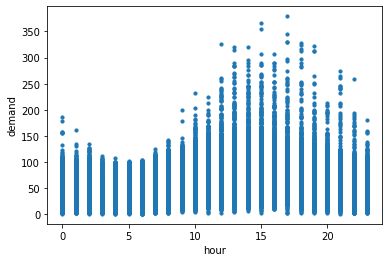

In [5]:
#checking hours vs demand trend
data.plot.scatter(x = 'hour', y = 'demand', s = 10);

In [6]:
len(data['hour'].unique())

24

In [7]:
import datetime
# checking date is weekend or not
def weekend_day(inp_date):
    weekno = datetime.datetime.strptime(inp_date, "%Y-%m-%d").date().weekday()

    if weekno < 5:
        return 0
    else:  # 5 Sat, 6 Sun
        return 1
weekend_day("2018-08-20")

0

In [8]:
import datetime

#getting week day
def week_day(inp_date):
    weekno = datetime.datetime.strptime(inp_date, "%Y-%m-%d").date().weekday()

    return weekno

In [9]:
rush_time = []
min = 12
max = 19

#checking rushtime or not
for time in data['hour']:
    if time > min and time < max:
      rush_time.append(1)
    else:
      rush_time.append(0)

In [10]:
weekends = []
weekday = []

for d in data['date']:
  #  weekends.append(weekend_day(d))
   weekday.append(week_day(d))

In [11]:
# data['weekends'] = weekends
data['weekday'] = weekday
# data['rush_time'] = rush_time
data.tail()

,date,hour,demand,weekday
18242,2021-02-28,19,95,6
18243,2021-02-28,20,88,6
18244,2021-02-28,21,39,6
18245,2021-02-28,22,104,6
18246,2021-02-28,23,85,6


In [12]:
cal = calendar()

#checking date is holiday or not
holidays = cal.holidays(start='2018-08-18', end='2021-02-28')

data['date'] = pd.to_datetime(data['date'], errors='coerce')

data['holiday'] = data['date'].isin(holidays).astype(int)


In [13]:
data.head()

,date,hour,demand,weekday,holiday
0,2018-08-18,9,91,5,0
1,2018-08-18,10,21,5,0
2,2018-08-18,13,23,5,0
3,2018-08-18,14,104,5,0
4,2018-08-18,15,81,5,0


#split

In [14]:
#defining target variable
data= data.drop('date', axis=1)

Y = data['demand']

data= data.drop('demand', axis=1)

x = data

#Modeling

#XGBoost

In [15]:
!pip install xgboost

In [16]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=463, gamma=1.0, min_child_weight=6.1929, max_depth=14, learning_rate=0.1186, subsample=0.9675, colsample_bytree=0.8544)

In [17]:
model.fit(x,Y)

[12:52:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(colsample_bytree=0.8544, gamma=1.0, learning_rate=0.1186,
             max_depth=14, min_child_weight=6.1929, n_estimators=463,
             subsample=0.9675)

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=1000, max_depth = 24, warm_start=True, min_samples_split= 5)
model.fit(x,Y)

RandomForestRegressor(max_depth=24, min_samples_split=5, n_estimators=1000,
                      warm_start=True)

#KNN Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=20,)

model.fit(x,Y)

KNeighborsRegressor(n_neighbors=20)

#Ridge

In [ ]:
from sklearn.linear_model import Ridge
import numpy as np

model = Ridge(alpha = 0.5)
model.fit(x,Y)

Ridge(alpha=0.5)

#creating submission file

In [27]:
#importing data
sub_data = pd.read_csv('/content/drive/MyDrive/JAT/test_6QvDdzb.csv')

In [28]:
sub_weekends = []
sub_weekday = []
#Featurization
for d in sub_data['date']:
  #  sub_weekends.append(weekend_day(d))

   sub_weekday.append(week_day(d))

# sub_data['weekends'] = sub_weekends

sub_data['weekday'] = sub_weekday

rush_time = []

for time in sub_data['hour']:
    if time > min and time < max:
      rush_time.append(1)
    else:
      rush_time.append(0)

# sub_data['rush_time'] = rush_time

In [29]:
#checking holiddays

cal = calendar()
holidays = cal.holidays(start='2021-03-01', end='2022-03-28')

sub_data['date'] = pd.to_datetime(sub_data['date'], errors='coerce')

sub_data['holiday'] = sub_data['date'].isin(holidays).astype(int)

In [30]:
sub_data.head()

,date,hour,weekday,holiday
0,2021-03-01,0,0,0
1,2021-03-01,1,0,0
2,2021-03-01,2,0,0
3,2021-03-01,3,0,0
4,2021-03-01,5,0,0


In [31]:
sub_data= sub_data.drop('date', axis=1)

In [32]:
#predicting value
out = model.predict(sub_data)

In [33]:
sub_data_out = pd.read_csv('/content/drive/MyDrive/JAT/test_6QvDdzb.csv')

In [34]:
#adding column
sub_data_out['demand'] = out

In [35]:
#exporting csv
sub_data_out.to_csv('Out.csv', index = False)